In [249]:
import numpy as np 
import sklearn
import pandas as pd 
%matplotlib inline
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
import re
import csv
import random

In [250]:
tweets=pd.read_csv('labelled_dataset.csv',encoding = "ISO-8859-1")
tweets.head()


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,Sentiment
0,8693,8693,@RNTata2000: Some further thoughts on impleme...,False,0,NaN,20-04-2017 15:39,False,NaN,8.550000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",apoliceshanigm2,2507,True,False,analytical
1,2306,2306,@MinhazMerchant: Difficult to verify but if t...,False,0,NaN,23-11-2016 10:20,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",TikuChand,1057,True,False,analytical
2,5339,5339,@bainjal: RT if you agree that @PMOIndia crea...,False,0,NaN,22-11-2016 20:38,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",JenixRino,635,True,False,analytical
3,9853,9853,@UrjitPatelRBI: What do think of the #demonet...,False,0,NaN,18-04-2017 06:50,False,NaN,8.540000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",LalitSi61261037,551,True,False,analytical
4,113,113,@CMOMaharashtra: Watch what @sonunigam thinks...,False,0,NaN,23-11-2016 18:08,False,NaN,8.010000e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",enzacdesccom191,428,True,False,analytical


In [251]:
tweets=tweets[~tweets.text.str.startswith('RT')]

lis_tweets=tweets.text



In [252]:
nltk.download('wordnet')
nltk.download('stopwords')
stop=stopwords.words('english')
stop.append('-')
stop.append("&amp;")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhilash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhilash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


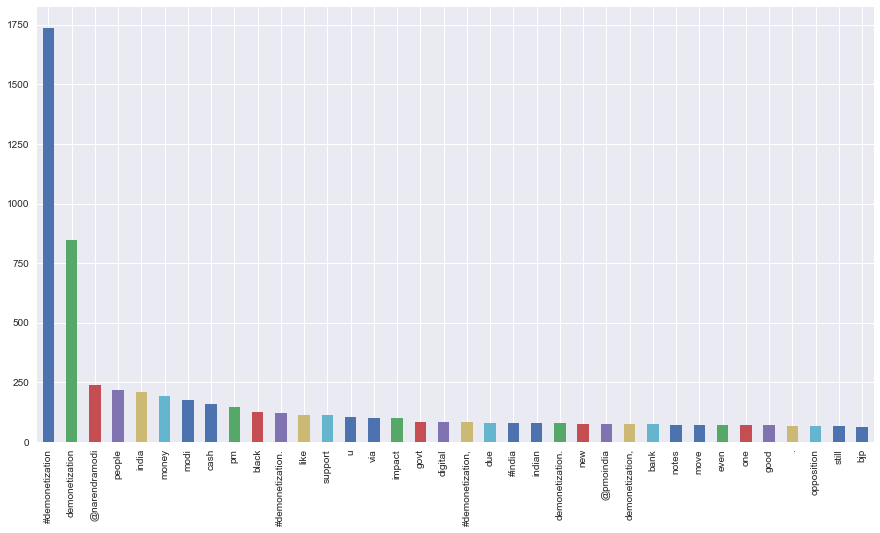

In [253]:

se=pd.Series(' '.join(tweets['text']).lower().split()).value_counts()[0:100]
#se.apply(lambda x: [item for item in x if item not in stop])

for i in stop:
    if i in se: del se[i]
        
plt.figure(figsize=(15,8))
se.plot.bar()
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA3AAAAIVCAYAAACQpB2KAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XuYXWV59/FvSJSIjYgaRUurby3eUhRrUTwBUvBQT6W1%0AolRtVQooWlGhryewagsW5cUTRcQABbRWPKGC9QzKQSkWRcHqjYCKVtCoAaKRSGDeP561zc4wkMns%0AZ63kyXw/15VrZq+suffKyp691289pwVTU1NIkiRJkjZ9W2zsA5AkSZIkzY4BTpIkSZIaYYCTJEmS%0ApEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGrFoYx/ATJYvXznrtQ222WYrVqxY1dux9Fnf2sPXt/bw%0A9a09fH1rD1/f2sPXt/bw9a09fH1rD19/U6q9dOmSBTNtb74FbtGihc3Wt/bw9a09fH1rD1/f2sPX%0At/bw9a09fH1rD1/f2sPXb6F28wFOkiRJkuYLA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMMcJIkSZLU%0ACAOcJEmSJDXCACdJkiRJjTDASZIkSVIjDHCSJEmS1AgDnCRJkiQ1wgAnSZIkSY0wwEmSJElSIxbN%0AZqeIeATw5szcIyI+AGzb/dX9gAszc9+IeAewK7Cy+7u9gd8A7wPu2W1/XmYur3j8kiRJkjRvrDfA%0ARcQrgb8BfgWQmft227cBzgFe0e26M/DEzPzZ2M8eAlyamW+IiH2Bw4GXVf0XSJIkSdI8MZsulFcC%0AT59h+xuBYzPzmojYAtgeeE9EXBAR+3X77Ap8uvv+U8DjJj1gSZIkSZqv1hvgMvMjwE3j2yLinsBe%0AwCndpjsDxwLPBf4MeHFE7ATcBbi+22clsHWVo5YkSZKkeWjB1NTUeneKiPsBH8jMR3aPXwxsk5lH%0Ado8XAltl5sru8VuAS4G/BI7KzIsiYmvggsx80Pqeb82am6cWLVo4x3+SJEmSJDVvwUwbZzWJyQwe%0ABxwx9vgBwOkR8VBKq96uwKmUyUueDFwEPAk4bzbFV6xYNesDWbp0CcuXr1z/jnPUZ31rD1/f2sPX%0At/bw9a09fH1rD1/f2sPXt/bw9a09fP1NqfbSpUtm3D7XZQQCuGr0IDO/DbwXuBD4EnBaZn4LOB7Y%0AMSLOBw6kjJuTJEmSJM3BrFrgMvP7wCPHHu84wz5HA0dP27YK2GeyQ1xrv6POnvW+J796z1pPK0mS%0AJEmbBBfyliRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJ%0AaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREG%0AOEmSJElqhAFOkiRJkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJ%0AkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJkhphgJMkSZKk%0ARhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGA%0AkyRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIk%0ASZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElq%0AhAFOkiRJkhqxaDY7RcQjgDdn5h4R8VDgLOC73V8fn5mnR8QBwAuBNcARmXlWRNwJeB9wT2Al8LzM%0AXF79XyFJkiRJ88B6A1xEvBL4G+BX3aadgbdm5jFj+2wLHAw8DFgMnB8RnwMOAi7NzDdExL7A4cDL%0A6v4TJEmSJGl+mE0L3JXA04H3do93BiIi9qa0wr0c2AW4IDNXA6sj4gpgJ2BX4C3dz30KeF3FY5ck%0ASZKkeWXB1NTUeneKiPsBH8jMR0bEC4BvZubFEXEYsA1wCfDgzHxVt/9pwGnAq4GXZua3I2IL4OrM%0A3G59z7dmzc1TixYtvNX2px368Vn/w848Zu9Z7ytJkiRJm5gFM22c1Ri4ac7IzOtG3wPHAucCS8b2%0AWQJcB9wwtn20bb1WrFg1h8Na1/LlKyeuAbB06ZJqtay98etbe/j61h6+vrWHr2/t4etbe/j61h6+%0AvrWHr78p1V66dMmM2+cyC+VnImKX7vu9gIuBi4DdImJxRGwN7ABcBlwAPLnb90nAeXN4PkmSJEkS%0Ac2uBOwg4NiJuAq4FDszMGyLinZSAtgVwWGbeGBHHA6dGxPnAb4Bn1zpwSZIkSZpvZhXgMvP7wCO7%0A778GPGaGfZYBy6ZtWwXsM/FRSpIkSZJcyFuSJEmSWmGAkyRJkqRGGOAkSZIkqREGOEmSJElqhAFO%0AkiRJkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIk%0ASWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJkhphgJMkSZKkRhjgJEmSJKkR%0ABjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAk%0ASZIkqREGOEmSJElqhAFOkiRJkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmS%0ApEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJkhph%0AgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6S%0AJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElqxKLZ7BQRjwDenJl7RMQfA8cCNwOrgb/NzJ9ExDuA%0AXYGV3Y/tDfwGeB9wz2778zJzeeV/gyRJkiTNC+ttgYuIVwInAou7Te8AXpqZewAfBV7Vbd8ZeGJm%0A7tH9uR44CLg0M3cDTgMOr3z8kiRJkjRvzKYL5ZXA08ce75uZl3TfLwJujIgtgO2B90TEBRGxX/f3%0AuwKf7r7/FPC4CscsSZIkSfPSgqmpqfXuFBH3Az6QmY8c2/Zo4CRgd+BG4GXAW4GFwDnAft3jl2bm%0At7uQd3Vmbre+51uz5uapRYsW3mr70w79+Cz+ScWZx+w9630lSZIkaROzYKaNsxoDN11EPAs4DHhK%0AZi6PiIXAOzJzVff3ZwMPAW4AlnQ/tgS4bjb1V6xYNZfDWsfy5SvXv9MsLF26pFota2/8+tYevr61%0Ah69v7eHrW3v4+tYevr61h69v7eHrb0q1ly5dMuP2DQ5wEfFc4IXAHpn5i27zA4DTI+KhlG6ZuwKn%0AUiYveTJwEfAk4LwNfT5JkiRJUrFBAa5raXsncDXw0YgA+FJmvj4i3gtcCNwEnJaZ34qI7wGnRsT5%0AlBkpn1316CVJkiRpHplVgMvM7wOj8W93u419jgaOnrZtFbDPBMcnSZIkSeq4kLckSZIkNcIAJ0mS%0AJEmNMMBJkiRJUiMMcJIkSZLUCAOcJEmSJDXCACdJkiRJjTDASZIkSVIjDHCSJEmS1AgDnCRJkiQ1%0AwgAnSZIkSY0wwEmSJElSIwxwkiRJktQIA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMMcJIkSZLUCAOc%0AJEmSJDXCACdJkiRJjTDASZIkSVIjDHCSJEmS1AgDnCRJkiQ1wgAnSZIkSY0wwEmSJElSIwxwkiRJ%0AktQIA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMMcJIkSZLUCAOcJEmSJDXCACdJkiRJjTDASZIkSVIj%0ADHCSJEmS1AgDnCRJkiQ1wgAnSZIkSY0wwEmSJElSIwxwkiRJktQIA5wkSZIkNcIAJ0mSJEmNMMBJ%0AkiRJUiMMcJIkSZLUCAOcJEmSJDXCACdJkiRJjTDASZIkSVIjDHCSJEmS1AgDnCRJkiQ1wgAnSZIk%0ASY0wwEmSJElSIwxwkiRJktQIA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMWzWaniHgE8ObM3CMi/hA4%0ABZgCLgNekpm3RMQBwAuBNcARmXlWRNwJeB9wT2Al8LzMXN7Dv0OSJEmSNnvrbYGLiFcCJwKLu01v%0ABQ7PzN2ABcDeEbEtcDDwGOCJwL9ExJbAQcCl3b6nAYfX/ydIkiRJ0vwwmy6UVwJPH3u8M/Cl7vtP%0AAY8DdgEuyMzVmXk9cAWwE7Ar8Olp+0qSJEmS5mC9AS4zPwLcNLZpQWZOdd+vBLYG7gJcP7bPTNtH%0A2yRJkiRJczCrMXDT3DL2/RLgOuCG7vvb2z7atl7bbLMVixYtnMOhrbV06ZL177QRall749e39vD1%0ArT18fWsPX9/aw9e39vD1rT18fWsPX39Trz2XAPf1iNgjM78IPAk4B7gIODIiFgNbAjtQJji5AHhy%0A9/dPAs6bzROsWLFqDoe1ruXLV05cA8pJrlXL2hu/vrWHr2/t4etbe/j61h6+vrWHr2/t4etbe/j6%0Am1Lt2wp7c1lG4FDgjRHxFeCOwIcz81rgnZSAdjZwWGbeCBwP7BgR5wMHAm+cw/NJkiRJkphlC1xm%0Afh94ZPf95cBjZ9hnGbBs2rZVwD4TH6UkSZIkyYW8JUmSJKkVBjhJkiRJaoQBTpIkSZIaYYCTJEmS%0ApEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJkhph%0AgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6S%0AJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJ%0AaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGLNrYB7CpeMnZ%0Ar5z1vsft+ZYej0SSJEmSZmYLnCRJkiQ1wgAnSZIkSY0wwEmSJElSIwxwkiRJktQIA5wkSZIkNcIA%0AJ0mSJEmNMMBJkiRJUiMMcJIkSZLUCAOcJEmSJDXCACdJkiRJjTDASZIkSVIjDHCSJEmS1AgDnCRJ%0AkiQ1wgAnSZIkSY0wwEmSJElSIwxwkiRJktQIA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMWzeWHIuL5%0AwPO7h4uBPwYeBZwFfLfbfnxmnh4RBwAvBNYAR2TmWZMcsCRJkiTNV3MKcJl5CnAKQEQcB5wM7Ay8%0ANTOPGe0XEdsCBwMPowS98yPic5m5erLDliRJkqT5Z6IulBHxMGDHzHwPJcA9JSLOjYiTImIJsAtw%0AQWauzszrgSuAnSY+akmSJEmah+bUAjfmtcAbu+8vAk7MzIsj4jDg9cAlwPVj+68Etl5f0W222YpF%0AixZOdGBLly6Z6OeHqt3KcQ5Zu+/61h6+vrWHr2/t4etbe/j61h6+vrWHr2/t4etv6rXnHOAi4q5A%0AZOY53aYzMvO60ffAscC5wPhRLgGuYz1WrFg118P6reXLV05co+/aS5cu6e04W63dd31rD1/f2sPX%0At/bw9a09fH1rD1/f2sPXt/bw9Tel2rcV9ibpQrk78IWxx5+JiF267/cCLqa0yu0WEYsjYmtgB+Cy%0ACZ5TkiRJkuatSbpQBnDV2OODgGMj4ibgWuDAzLwhIt4JnEcJi4dl5o0TPKckSZIkzVtzDnCZefS0%0Ax18DHjPDfsuAZXN9HkmSJElS4ULekiRJktQIA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMMcJIkSZLU%0ACAOcJEmSJDXCACdJkiRJjTDASZIkSVIjDHCSJEmS1AgDnCRJkiQ1wgAnSZIkSY0wwEmSJElSIwxw%0AkiRJktQIA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMMcJIkSZLUCAOcJEmSJDXCACdJkiRJjTDASZIk%0ASVIjDHCSJEmS1AgDnCRJkiQ1wgAnSZIkSY0wwEmSJElSIwxwkiRJktQIA5wkSZIkNcIAJ0mSJEmN%0AMMBJkiRJUiMMcJIkSZLUCAOcJEmSJDXCACdJkiRJjTDASZIkSVIjDHCSJEmS1AgDnCRJkiQ1wgAn%0ASZIkSY0wwEmSJElSIwxwkiRJktQIA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMMcJIkSZLUCAOcJEmS%0AJDXCACdJkiRJjTDASZIkSVIjDHCSJEmS1AgDnCRJkiQ1wgAnSZIkSY0wwEmSJElSIwxwkiRJktQI%0AA5wkSZIkNcIAJ0mSJEmNWDTXH4yIrwE3dA+/BxwJnAJMAZcBL8nMWyLiAOCFwBrgiMw8a6IjliRJ%0AkqR5ak4BLiIWAwsyc4+xbZ8ADs/ML0bEu4G9I+IrwMHAw4DFwPkR8bnMXD35oUuSJEnS/DLXFriH%0AAFtFxGe7Gq8Fdga+1P39p4AnADcDF3SBbXVEXAHsBHx1oqOWJEmSpHlorgFuFfD/gBOB7SmBbUFm%0ATnV/vxLYGrgLcP3Yz422S5IkSZI20FwD3OXAFV1guzwifk5pgRtZAlxHGSO3ZIbtt2ubbbZi0aKF%0Aczy0YunSJevfaROo3cpxDlm77/rWHr6+tYevb+3h61t7+PrWHr6+tYevb+3h62/qteca4PYDHgy8%0AOCLuQ2lp+2xE7JGZXwSeBJwDXAQc2Y2Z2xLYgTLBye1asWLVHA9rreXLV05co+/aS5cu6e04W63d%0Ad31rD1/f2sPXt/bw9a09fH1rD1/f2sPXt/bw9Tel2rcV9uYa4E4CTomI8ymzTu4H/AxYFhF3BL4N%0AfDgzb46IdwLnUZYsOCwzb5zjc0qSJEnSvDanAJeZvwGePcNfPXaGfZcBy+byPJIkSZKktVzIW5Ik%0ASZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElq%0AhAFOkiRJkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4%0ASZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJkhphgJMkSZKkRhjgJEmS%0AJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRG%0AGOAkSZIkqREGOEmSJElqhAFOkiRJkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCT%0AJEmSpEYY4CRJkiSpEQY4SZIkSWqEAU6SJEmSGmGAkyRJkqRGGOAkSZIkqREGOEmSJElqhAFOkiRJ%0AkhphgJMkSZKkRhjgJEmSJKkRBjhJkiRJaoQBTpIkSZIaYYCTJEmSpEYY4CRJkiSpEQY4SZIkSWrE%0Aorn8UETcATgZuB+wJXAE8EPgLOC73W7HZ+bpEXEA8EJgDXBEZp416UFLkiRJ0nw0pwAHPBf4eWb+%0ATUTcDbgE+CfgrZl5zGiniNgWOBh4GLAYOD8iPpeZqyc8bkmSJEmad+Ya4D4EfLj7fgGldW1nICJi%0Ab0or3MuBXYALusC2OiKuAHYCvjrRUUuSJEnSPLRgampqzj8cEUuATwDLKF0pv5mZF0fEYcA2lJa5%0AB2fmq7r9TwNOy8zP317dNWtunlq0aOGttj/t0I/P+tjOPGbvWe8L8MzTD5r1vh981vEbVFuSJEmS%0ANtCCmTbOtQWOiPg94AzgXZn5/oi4a2Ze1/31GcCxwLnAkrEfWwJcx3qsWLFqrof1W8uXr5y4Rt+1%0Aly5d0ttxtlq77/rWHr6+tYevb+3h61t7+PrWHr6+tYevb+3h629KtZcuXTLj9jnNQhkR9wI+C7wq%0AM0/uNn8mInbpvt8LuBi4CNgtIhZHxNbADsBlc3lOSZIkSZrv5toC91pKF8nXRcTrum2HAG+LiJuA%0Aa4EDM/OGiHgncB4lLB6WmTdOetCtuXz/58+8/Tb2f8CJp/R1KJIkSZIaNqcAl5kvA142w189ZoZ9%0Al1HGyEmSJEmSJuBC3pIkSZLUCAOcJEmSJDXCACdJkiRJjZjzMgLaNBx/1Bc3aP+DXr1HL8chSZIk%0AqX+2wEmSJElSI2yB0+26+uv/dOttt7Hv7z/0H/s9GEmSJGmeswVOkiRJkhphgJMkSZKkRhjgJEmS%0AJKkRjoHTRvPar3531vu+6eHb93gkkiRJUhtsgZMkSZKkRhjgJEmSJKkRBjhJkiRJaoRj4LRZ2u+o%0Aszdo/5NfvWdPRyJJkiTVYwucJEmSJDXCACdJkiRJjTDASZIkSVIjHAMnbSDH10mSJGljsQVOkiRJ%0AkhphgJMkSZKkRtiFUtrEvOTsV8563+P2fEuPRyJJkqRNjS1wkiRJktQIA5wkSZIkNcIAJ0mSJEmN%0AMMBJkiRJUiOcxESaRy7f//kzb59h2wNOPKXPQ5EkSdIcGOAkVXH8UV/coP0PevUevRyHJEnS5swu%0AlJIkSZLUCFvgJG3yrv76P828/Tb2//2H/uMG1X/tV787633f9PDtN6i2JElSTbbASZIkSVIjbIGT%0ApB7td9TZs9735Ffv2eORSJKkzYEBTpIatSHhEDYsIL7k7FduUO3j9nzLBu0vSZLmxi6UkiRJktQI%0AA5wkSZIkNcIAJ0mSJEmNcAycJGlwl+///Ftvu419H3DiKRtUe0MWld/QBeX7XtJCkqT1McBJkrQJ%0A2JD1CGHD1yTsc0bUPms7oY4krcsAJ0mS5qWZWoJh82sN3tCW4L5vJkiajAFOkiRJg+hz+ZMNrd9n%0Aa/CGtgT3eTNhQ24kwIbfTNDwDHCSJEmS5mSm1uBa44I3pDW4z27lsOGBv08GOEmSJEmqpO9w6DIC%0AkiRJktQIA5wkSZIkNcIAJ0mSJEmNMMBJkiRJUiMMcJIkSZLUCAOcJEmSJDXCACdJkiRJjTDASZIk%0ASVIjDHCSJEmS1AgDnCRJkiQ1wgAnSZIkSY1Y1PcTRMQWwLuAhwCrgf0z84q+n1eSJEmSNjdDtMD9%0ABbA4Mx8FvBo4ZoDnlCRJkqTNzhABblfg0wCZeSHwsAGeU5IkSZI2OwumpqZ6fYKIOBH4SGZ+qnt8%0ANfAHmbmm1yeWJEmSpM3MEC1wNwBLxp/T8CZJkiRJG26IAHcB8GSAiHgkcOkAzylJkiRJm53eZ6EE%0AzgAeHxFfBhYALxjgOSVJkiRps9P7GDhJkiRJUh0u5C1JkiRJjTDASZIkSVIjDHCSJEmS1AgDnCQA%0AImKbjX0MkrSxRMS9N/YxSNJsDDELZXURsQB4OLB4tC0zz61U+4+BA6fV3q9C3cMz84iI+A9gnZlj%0AMvPZk9Yfe569gPsDFwKXZ+aNleo+kjKD6B0os4neJzOfWKN2V/+/gfcBp2XmLyrV3C4zfxQRD5j+%0Ad5l5eaXneBjwfGCrsdoTv1662guBHVn3tXhRjdpd/WMz86Xd908EjgVuda42Nd15eT5wX+Bs4LLM%0A/Fml2k/NzLPGHj8zMz9Yo3ZX73us+/t/Q2b+caXa92bd38+v1Kjb1a5+Xrr/x4XAB4BnUY57C+A/%0AM3PPSWpvLiJie2B74JvA/2ZmlVnHImIR5TN0/PXyHzVqd/V7+4ye4bkelpn/XancKRGxJXAm8NHM%0A/F6lur2f8xmebyfgl5l5VYVa22Xmj8Ye75uZH5i07li9LSjn5NHAf2Xmb2rV7urfrdZ1xZD6+v0f%0AWkR8ODOfUaFOL+8rEXHH2/q7Wq/F7jr0aMo11reAQzPzB5PUbDLAAR8B7gn8sHs8BdT6cDgF+Nex%0A2rWc2X19d+W6vxURbwK2A3YAVgOvAf66UvnjgbcAz6Cs5XebL/g5ehzwbODMiPghcGJmfn7CmocC%0ArwBOmLZ9Cqh1gXg85fVybaV64/4T2BJY0T2eAp5esf4NEXEU8DvAg4AnVaz9W7XevMecAPwYeDzw%0AVeA0urUm5yoingo8BvjriHh0t3kh8OdAtQAHPLD7ugDYmfL7NLGIOAl4FHBnys2EK4FHVqjb53nZ%0AD3gtsC2QlHNyM3D+hHWJiK8w7UZZV38qMx89w49U0d2g+xFwdGb+dMJafw/8JXA34FTgD4G/n/gg%0AizMoQeJ3Kf+fPwZqhok+P6On2weoEuAy84kRcRfKe+H7ImKrzHxojdr0f86newFwRUR8fDx8zdGH%0AI+IpwBrKZ942lBsvE4uItwPfptyQ+xPgJ8DzKtV+LHAcsDAiPgT8IDNPqlT7bynXWFuy9r3lD2rU%0A7upX//2PiHO49fsiAD3fNDugUp2+3leyq7Vg2vYpoNb/6WnAG4EvA7tSssafTlKw1QC3bY8fwtdm%0A5ok91H1IRDykh7rjds3M3SPinMw8NSIOqlj7Z5n5HxHxhMx8Q0R8qWJtMvM64F3dG8zrgPd3rRVH%0AZeYZc6z5iu7rRL8k63FDZp7aU+3FmfnYnmqTmYdFxNHAH2bmHn09D/XevEfun5n7R8SumXlmRLy6%0AQs1vAHcHfk15Mwe4hcoXWJm5euzhBRHxL5VKP4TSWnsCJRR9uFLd8fPyHcoHXJXzkpnLgGURcWBm%0AvmfSetPsW7nebL0c+Bm3vhCYi32B3YEvZObbI+KrFWqO3CMzHxURJwIvBT5XsTb0+xm9jsx8Va1a%0AEfEXlJuJjwCuBj5Tqzb9n/N1jD7/KjkY+DiwNfC2zDy5Yu2HZ+bLu+uWP42IL1Ss/c+U36GPAG8C%0ALgCqBDjgVcDTqH+zf6SP3/8XdV9fD3yMcj52AZ5aofZtyswV699rVnp5X8nM/1O75gx+lZmf6r7/%0AZEQcMmnBVgPcdyLiPpn54x5qf7+7IPw63Z2KzPxshbo7dF8fQbkY+jJru1OcVqE+wKKIWAxMdd2T%0Abq5UF+CWiNgR2CoignJXqJqIeDHwt8ANwImUO3B3oHQFnVOAm6G72k1dzRsz848mPN4ndN9eHxGv%0ABS6m7usF4Nyua+O3Rxsy8+pJi0bENaw9LwuAe0XEj7v696lQ/1bdHKh7931RRNyje64llEAxkcz8%0AIXBqRDz2cb0uAAAgAElEQVSkx0BOF9hG5/7eVDj2zs8zcyoi7pyZPyu/opMbOy+fAnbKzM9HxEuA%0A71d5guIVEfGHlFb3Kl2bR11Turr7MNZtDXhhjefo6s/UpecnlcpvQXmtjF4vq29n3w21qvt658z8%0AdUTU7prV22d0X8McOv9COc9HAZ/ubizW0us57+O8jH3OAXyB0uvhR92N3FqfcwsjYmfKtdcdgSWV%0A6gLckpm/iIipzLwxIlZWrH1VZl5Rsd501X//MzMBIuJeY13gz4iIl05aeyC9vK/cRo8NACoGxh9G%0AxOGUYR87A6tHv19z/V1qNcDtClwdET+je4HXuPDsbAlE94eu/sRvVJn5GoCI+HRmPmW0PSJqvQkC%0AvI0SJJYC/9U9ruUQyh3+dwLvB2regYPSrWTfzPz+2LabImKSi60HUi7ajgNOyMyLIuKhwIsnqDky%0A6pp6PaWP+vbd4yqvl869gLcDo4uIKcoYgYlk5m8H6ncX/L+q/KbYd/epwyl3Du9NCfgvq1h7h4i4%0Aa+ULt3HfGfv+G8CnK9W9OCL+AfhxRHyAsTGZlfw78I7u+xWU8aq17to+hNIl863dDah/y8x/r1T7%0A/ZQbQLtSuqz9TqW6I32+1t/f1bpvRPwn5Y55LR+NiH8EvhERFwK/rFgb1n5GL+8e1/yMPoV+hjmQ%0AmTtExP2AJ1LO0VaZOXFX5E7f5/wU6p+X6UMwsttW83PuNOBdlC7Vb+HWQx4mcUV30+zu3Y35icYc%0ATbOqu7F1CWtv3r62Yv0+f/+JiL8DLqJcU1Qdc9ijvq79h+ixMUWZn+L+3eOfMOHv0oKpqSbHRPYq%0AIh4E/BFlEpBLKtf+GrBnZl4XEXcHPpuZO1esvw2lr/T3akzsEBGLMnPNTIM8aw407sYdvJJyh/ws%0A4Ju17m5FxBfHuwhGxLmZuXuN2l29hZSg+CgqDsCufZwz1H89sGVmvrYbH/DfmfnmCnW/3PM4oztk%0A5k0RsZTSXe0PMvPKSrV/QBlH+jNK61jNC89eRcTvADdSxu/816RjsKbVXuf/NCLOrj1mIiJ2pXRB%0A3DEzd1jf/rOseXZm7hkRJ2fmfhFxXmbuVqN2V7/v1/oOlPGpmZnf7Ok5Hgx8NytNeNW37ibon/VU%0A+08o42kfT2kx+3hmVh+33sc57/O89C0itqaMgbsyM39Vse4iYH/gwZSbZydU/Hy+1Ti92r03+vr9%0Aj4htgcMoN57/BzgyM39eq35rImL/zDxxWg8ZYPJQfnvX0MBNOcHENE22wHVvfidTLrSuBfbLzK9X%0Aqv1SymQa/wX8Q0R8MDP/X43anSOBSyLiF5T+5BM3XccMM1t222vMcHka5XxMH+RZc3AnlH7pnwIe%0AS/k/Pan7vobrIuKfWXu36ZpKdWcagH0tZYbEGr4ZZfbP8e68Ne+U/fno5kFm7hMRFwATBzj67eIM%0AZfzVMzJzeddCeyiVZs/MzPvWqDOUsQ+eN037q0dRxsLV8puIeDylxXMX6nX9pGuVeCbwNeCdWXe2%0AwqnuYmVJRNyZ+i1wfXYV/MexhztExF9k5j9NWPM2Z0OmvM9XEf3OWtzXMAcorfsfpbw3Xl+j4FDn%0AnB7PS0S8hjLmaxVrJ+yocmMrIv6Kct4XAR/sujseUaM28CFgGSW41W6t+HfKZ/3v082GXLN4RPwe%0AZYzdYir9/o9k5rUR8WlKa222Et56vPYftVp/Z9r2Gq+Z8WvoBZQx5aMWxEURcWFmPnMuhZsMcJRu%0AfPtn5je6ft/HUWZKq+HZwG5dYr4DZaxatQCXmR+JiI9TWpp+lJk1LoSm3yGcaTadORkFwAEGed49%0AM0+OiOdm5pejTCtcy3Mog3efQrnb9IaKtfscgL07pWvZUuCnlDGNNUPzLRFxx8z8Tfdar3XO++zi%0ADPD5iHgvcFdK99JH1Crc582hnow+eF5MCWy/pmK4GrM/5X3wnZTfoWrjyChdMh9T64J5mjdSZnJ7%0AL3BV97WmPl/ro7F0Cyg3h2r8fvY+G3Knz1mLexnm0Hk+pSfInhFRqyfIUOe8z/OyLyWEr1rvnhvu%0AEMqMuZ8GjqDMKForwB1BuZHwpoj4GHByVhhH3nk3lWdDnuZDwOfpoatw19K0PWXG3+dFxO6ZeWjt%0A5+lBL9f+mTmarOjhmfnbmT4j4jQmnKNirBHlJZQuzldQbiQemJnnRMScJxxrNcAtyMxvAGTmJRGx%0ApnLtNV3tmyLipoq1iYg/pbQuXQ9sExEHZOZEs1Fl5pe62vekNIuP1pk4csLDvb1pZ6cyc69J6097%0Argd2X7ejTFdcy43dn1vo7h5WrN3nAOw3AG+l3BW6C1BzVlEoH0CXRcSllPGCb6lRNDN7WUturAvC%0AyZQ3wL2Av6v8NH3eHKpu7INnL8qFym6UMV9Vx6h2F7F/MXocdRc8/hhwYkT8EXA58IppY2EncZfM%0APL77/hMRMac7nbelr9d6V3udsUDdeJtJDTEbMvQ4a3FmvqDHYQ599AQZ5Jz3fF6+R7k51IebM3N1%0A1/I2FRHVulBm5sWU8cHbUG4qfJcSdGsYzYa8W9abDXncysw8vHLNkd0z8zEAEfEOSs+KFvRy7R9l%0AYq7DgbtFxGippgWUm5W1vB54RNdzaFvK594jc4IllloNcDdHWZ/oPEorRc3Zuc7vEvF5lIuhCyrW%0AhjKt7a6Z+eOI+F1Kd41a0wmf3v05mXLR+V4mn2hgqGlnDwb+jTJb54epM9HIyHsoLTWfpXwYn0iZ%0A8bKGPgdgvw7YJTN/GhH3otzJrTbpTWaeFBGfoLTqXVljzCT02oo101oto221Wib7vDnUm54vVOi6%0AIL+I0pKyFSVo7Vip/Hsox3wusAflonmim0Mx8/p1WwB7U3Fdv56784+Hw/tQumlPaojZkKHHWYt7%0AHubQR0+QQc55z+fljsCl3c0+KDdwa3X/PD8i3g9sFxHvprRmVRERu1FaVR9Oua74h1q1WTsb8lRU%0Amg15mssiYl/W7RJbZZZe4A4RsUXXA6z2Te0+9XLtn5nHAcd13dY/QmlAeBXlhm4tKzNzefd819a4%0AUdFqgNuP0p3nKEpCrrbOVGb+Q5QFK3egNLf/Z63anZtH4yUy838jourA8bEB19+ocbc5c5hpZzPz%0AMsq4nT5sn2snA/lYRHy5VuHMfBclwAG8vOuKWMvPs5uIIjN/EhE3VKx9q3Eq3VieGuNU+urmMMRa%0ALX3eHOrNtAuVD1H3QgXKWIztKDPbvpW1r/kaFmfmJ7rvPxYRNdavuq11/aosPjymzxbbE1h7YXUj%0ApavZRHKY2ZCh31mLex3mULsnyIDnvM/zUmNs9IyyTKL1Z5Sg8p3MPHN9P7MBXk65QbR/D2PgDqO/%0A2ZAB/phyI+v+lBbQnwK1Jo46nbIO6YWUGwu13xf70tu1f2cvyo3Ev6cE/rcx4WLbsXZ8+qKuW/b5%0AlEaQia8tmgpw0c3mQpmE4jlUvHMQEU/NzLMi4sBu0w2UO0K1F5m9oQs/51IuEH9RsfZ3IuI5wDmU%0AdSZ+PrqLW+POTfQ47WxE/C3watZdw6ZWq8riKNNBr4qIrYCFleoSZRKNQ1g7WP8mKk2oAayMiM8A%0AX6L8f241ejPIOtMV9zVOpa9uDv+amX8/QwCfGnUHqWD0AfEvlMlpan9A9OXllMH6fVyoAFzTdXNa%0AkplXxMwzas3Vooh4cGZe2rVo1XBNZp4aER+k7nqY01V/rcfa9StHLc2j9SvfRr1lJ+4Z3XIZUWZD%0AvnuNomOf0d/t/kD9G3N9DnM4mBI2d6DcCKnZE6SXcz6mz/NyKWVphfH1FCfqFhtl9uaFlPDwLMpE%0AIAuj7gy3z6KM1/3ziLgcOD7rTQR2fWZGdLMh9/C+ezxlDN/nKLNo/lutwpl5THdtEZT1N79Vq3Yf%0A+rz2n+YWys3bwzPzAxFR4/M/p30F+HiFum0FOG49IyKs/Y+c9GJ/9GY6fWxH7RfJcyl9bY+k3EGo%0AtQAplHFMD6SMCxp9+I/u4k76hvgcyh2nZ1LG1z1nwnrTvYoyYUf1AbuUtdQuiYhvUcYHvL5i7ZdQ%0Aun0dTvnAf3nF2uPrvvxvxbojfY1T6asVa2EXYKev5VPtdzQzf9A9RwDfym5B6E1dZv5Vz0/xo4jY%0AD/hVlAHwd61Y+6XASRFxH8rr/MD17D8bo8+K/6Hf2XP7eK3f1vqVNcfAVp8NuTPErMV9DnP4E2Ab%0ASpf7bSndqWodd1/nfKTP83IG5YbWgymtwTUmM9mPMvHStqydoe9mSgtFLSdQ/i8/R/3hE0d0Qfzf%0AKK3M1cbudV4B/Elm/rLronk2lSZh6lqXX09pJc+IqDnuuA99XvuPuwPlpva5UearmPhGZVZeWmJc%0AUwFurM/1MzPzt/2kI2KPCrVHJ/nmHJvCtrtYqemXlF/CO1FefNtTWrUmlmUWxLtTmtyvqjWmqat9%0AbTcOZtRCdmeg5tSzV2Wldd9m8EvKRCBLgKspb+C1ugz8ODOv6VomvhhlbbUq+vzF7/Q1TqWvbg6j%0AgdZ5u3tNICKOoHSZuAg4OCLOyMyj+3q+hryQ0oXyQ5SumjWnP/8kZdH65ZQL6PMi4ifAi3OOEzzl%0AcLPnVn+tZ+ZqgIi4f2Ze1G37+qhrXw25djbkpcBPM7NKK+UQ573nYQ6vonQX7mOR8F7O+Vj9Ps/L%0Agsx8UUScTJmR9rxJC2bmMmBZROyXmVUnXRrT5/CJp0WZjOJvgM9GxLczc/9a9YFbMvOX3XOtrDzc%0AZhmVxx33qc9r/2leQJlV9CTKeOlbrfW3KWkqwEVZ6HVH4BUR8dZu8xaU/qoPmrD231HemHaIiNFU%0AsFtQEvhrJqk9zX92NVew9g7C02/3J2YpIvahNLl/G3hQRLwhM99Xqfa7KAsEX8Pa4665gO2qKLOs%0AXcLaAbu11rE6mnJX/7pK9cZdHxF/QRnI/ELqd4vpU9VxKn13cxgg0AL8GWXimFu6Lj5fobx+5rt7%0AsHa9vW9RcS1FykXEG7L0R7o/5c7wPwHvY8IJnrpuU+OfczdRLs5fmZlfm6DuEF16+ly/8vGUO/yL%0Au8fU6LYWPc5aPNAwh95uJPZ4zoc4L2siYjHlxu0Uda8dPxcRH6KbPZO6s9D2NnyicwfKZFELqTtz%0ANsBVEXEMa4fbXFmxdh/jjnvT57X/uMwc7/pdbbKrvjQV4FjbrWFL1nZ1vIWybsuk3gd8gdKkP5p+%0A/xbKwNGaFmdmrQWqpzsE2Hlak3uVAEcZdHn/rLNu3UxqTxYz7lvZLbXQg+MorQavAY4FhggZExkb%0AvzT+ZvVoJr8AHaqbQ59+RGmpvZ7y4fyT29993jid8oFWc4bbke1GkyVl5pUR8fvdOLsaF0TnUFoN%0Az6OMxdqf0uXpnZQ13OZqiNf6aP3Kp1J//cq3Ubp7125p6nPW4iGGOfR5I7Gvcz7EeTmOcuxfpfRi%0Aqdk9s/ostGN6Gz4REWdTrkU/Ajxu1FpW0QsoPR8eT7kpX3OZgj7GHfepz2v/ZjUV4LLMVHhZRCzL%0AbiZHgKgw81/XbeX7UdaDeBhrB+vuCvzHpPXHnBsRT6T8Qo6eu9bCkn02uV9JuXPYx0KeAP9OebMa%0A3YU7/vZ33yAfj4ivsO45rzX28Bhg3yzLQvxf4JRu26Zs/KJzC8oFwGgh4jlffA7YzaFP9wEuj4hv%0AUF6Lvxl1u8nMmi3Ozcm166lVmeF2zDURcRRl1rxHA9d2rRU1Jht4QGZ+vvv+ixHxusz8wqRdnYd4%0ArWfmr+jvveTqsfNSzSiIRw+zFg80zKHPG4l9nfMhzsuvKb1Yrqe0YtdcLqfP1qA+h0+cQblmOQC4%0Aa0T8IDNPqlSbroX/uFr1pulj3HFvxq7935OZNXt/NK2pADfmaRFxKOX4a8/891FKePtdSrP4j6kb%0A4O5FuSs06s5Xsytin03uvwf8ICKuYO2dyZoXtH0ONj6YMjC1jy6UN2XmlQCZeVVE9NVCWc1ofErX%0AVfhfgSsoC2NP9CY+VDeHnu3TfZ2+3tx81+cMt39Lee09CbiM0tL0UOCvJ6wLJYC/iLXhcHVE7MyE%0An32bwWv9p1HW3BpfY6rmbMvVZy0eYphDz920eznnAw3/mHER4kq1+2wN6nP4xD6U66yPAG+itEpW%0AC3A9qz7uuE8R8eEsC15/LSLW6fGQmffZiIe2UbUa4F5CucjvY+a/e2TmoyLiRMpditov5gdm5g7r%0A321ORk3uj6NSk3tE7J+ZJ1Jm/hufka/2eI/eBhsD12bm6RXrjRvNWvgVSlehPmaL7EvtD+XNoZvD%0AlpQP/dFYr0NbmYmyZ6MZbscH6VeZ4TYzb+TWC6Z+ZZKaY55NmT13b8pU6H9D+T2dtAW+9df697qv%0A23Zfa7+f9zFr8VDDHPrS1zkf4rxUX4R4zHhr0I+pu3RLn8MnbsnMX0TEVGbeGBEre3qePvQ27rgP%0AXXgjM6d3E57XWg1wvc38x9ougnfOzF+Ppf1avhllAeXxu3C11iWZokxjvYIyZmJrSte4SYz669da%0Af+i29DnY+NcR8WnWPee1xjW8gDLu48mU0HzE7e++San6odxnF+cBnQa8kdJisyulS+xEC3luDjKz%0AqXMQEdtl5o8o3YPfzdrxaXfPzE9NWr/V1/rYeanZq+RWsodZiwcc5lBV3+e8z/MSPS5CPOYhlC6O%0AN1Fm6DyDeuNI+xw+cUXXTfXuEfFqbr28zaasz3HHvYmIx1FyyxaUOQdel5nv37hHtfG0GuCmz/x3%0Aj4q1PxoRr6OM87iQ0oe6pt2Bp4w9rjno/QTKHazHUwYbn0YJFnOWmZ/pvvY9OUefa7WdWbHWOrrW%0Ag7f3Vb8PA3wo99nFuW+/GrvA/2REHLJRj2YTEWV5hb9jrNVgE++6ckj3Z9RKOK7WIsHQ3mt9dF4+%0AQuk+dQ9KsKqxVuhvRb+zFvc9zKG2mV6Lo3NS87XYx3npbRHiMa+kp6Ub6Hf4xIsoPRLOp6wBV7Pl%0AsG99jjvu05GUXhXHUSbT+iBlBu15qdUAtz/wh5T+3YdSxh3UchKwOjOnIuKTlA/kajJzp5r1prl/%0AZu4fEbtl5pndXaFW9DbYeKDp51vS94dyn12c+/bDiDicMoPrzpQxU08AyMzPbtQj27ieCtyvu9vf%0Agr/sbvKNxjHeRLm4rTmxE7T3Wn9QRHyU8tn/j8CRPbWu9jlrcd/DHKrKzEO6r72t09qpfl4G+uzs%0Acw3Y3oZPdJOMvLuP2gPoc9xxn1ZRZoZe07Xy1+4h15RWA9zbgUMy83rg0Ig4BajVz3k58AzgM92g%0A2rOpe2fyzykf+qNuDnevGOoWRcQ9KC2TSyj94FvR52BjjRngQ7nPLs59m6JcYN2/e/wTyofaFDCf%0AA9zXKd3hWglwD6S8vx4HnJCZF0XEQ4GDKj9PU6/1zHxC10X9IkrX4D+KiM8BV2bmi27/pzdIn7MW%0A9z3MoRfR4zqtnSbPC/0u3dDn8Ilm9TzuuE83UIbzvKfrMtzK+NdetBrgnkDp3vSMzLwWuG/F2t+h%0AzCx2j8z8d+rPRHcEZaKRF1FmdHt8xdqHARdSZoz8Cpv+3eBxfQ421rD67OLcq8x8wcY+hk3UZZRu%0AN9eydvavTXZtv1FLYUTcPzMv6rZ9PSIeWPmpmnqtR8TJlO71N1BmztszMx8fETU/Q6HfWYv7HubQ%0Alz7XaYV2z0ufSzf0NnxCG8UzKS37/xMRO1JmK5+3Wg1wVwD/AJwZEc8Fbq5YeyXw58AHupn5qnah%0ABK7JzK9ExIsy85SIeH7F2veg/J9eAdyJMtCzFX0ONtaw+uzi3KuIuIa1SwjcjdK9p69ZY1vyLOD/%0A0F4L+XXdZBqj6exrryHU2mv9NZSZZu9L6Ta9Y0QcCXyNCpMwDDRrca/DHHrU5zqt0Oh56bNHiMMn%0ANjtLgTdGxGi94FcA39+oR7QRtXSBv47MvJi146S2q1h6QTcr5D7ATtRb62RkdUTsDtwhyoLeNe/Y%0Avg7YJTN3pFystDQj4sGUrrGnj/1Rm95OCT4/zsxDKTN1NiEz752Z9+mmK34ApUVb5WL8V5m5evRn%0AYx/QLD2HEjqfClxLvbUlR5p6rWfmTzLz48AFmflUynTiH6XM1lnD+KzF438+U6k+lGEOo3GplwLv%0Aqli7T1dFxDERsXeU9VprrtMK7Z4XabaWAe+lTGByKu2su9eLVlvgTgfIzG933Vdqrlb/gq72zcDz%0AIqJ2E/xBlPEZRwD/TN2Q9fPM/CmUD+qIuKFi7b71uVabhtVnF+fBZOYPeuhy16rfA66MiKuo3yWu%0AN5n5K+CYHp+iydd6Zj6z+/qMbtPFleoOMWtx38Mc+jJap/XxlGV+XlW5fqvnRZqtxZn5ie77j833%0AWaKbCnAR8bDM/G/KnawnjP3V9MGYc6l9eGYeAfzLDIN/Pzxp/TFHZ+azu+//qmJdgJUR8RnKhC47%0AA1uNpoxvYOCug403H312ce5VRPwHa7t73ZvSajNvjXWJ+x5rFyKG+gs/t6rZ13rD+h7m0Jc7U1oo%0Al3ePn06ZBr2WVs+LNFuLIuLB3QSDD2aefw41FeCAvYD/5tZTndaYIW7U0tb3tLBbRsROlP67t0DV%0Ahbw/Nvb9/1aqORQHG29GMvPiiBh1cb7Txj6eDfBJYGtgDWXc15Eb93A2uvEucZpBw6/1Vi3IzN90%0AszqeTP1hDn35LKXlbTSOdIq6Aa7V8yLN1sHAyRFxb8o6hwdu5OPZqJoKcJn55u7bC7q7wgBExMEV%0Ayl8WEXcEXka5cFtAWQzzk9RdbDNYd82tagt5tzxgt+Vj16302cW5bwdQ1sR5CfAeyvIWfayT1YSB%0AusS1rOXXeqv6HubQl+t7nuW21fMizUo3k/CTKcv8XJ6Zv9jYx7QxNRXgIuKvKV0E/jQiRqFqC+DB%0ATN6Ncj/gtcC2lAWOF1C6w5w/Yd11ZOaDataTNhV9dnEe0C2UiR0Oy8wPRMQBG/uAtOnZTF7rTRlw%0AmENfPhMRL6K0wgGQmedOWnQzOC/SrETEiynLY11GmUH3nyuvpdiUpgIcpRvPNZQZs07ott1Chdmc%0AMnMZsCwi9svMkyetN11EnMPM/XWnMnOv2s8nbQR9dnEeyh2AtwDnRsSfAnfcyMejTdPm8FpvzVDD%0AHPqyG7Al8Nju8RTlZtGkWj8v0mwdAOyUmTdGxFaU+R4McC3IzBXAF4EvRsRelGbUC4GazaifjYj3%0AAfcEPgR8MzP/q0LdF3VfX08Zq3YBsAtlemupeT13cR7KCyizxJ0E7A08b+MejjZFm8lrvTVDDXPo%0Ay+9k5uN6qNv6eZFm6yeU8ekAvwZ+vhGPZaNrKsCNdDMrbgfsAKymLE46/U7oXJ1AmXb6dZS7Y6dS%0AYTBwZiZARNwrM0cDl8+IiJdOWlvaFPTcxXkQmfld4Lvdw5oTDGgzsjm81hs0yDCHHl0WEfuy7kzL%0Al1eo2/p5kWZrC+CSiPgy8FDKesrvBxib3X3eaDLAAbtm5u4RcU5mnhoRB1WsfafMPLvrV54RcWPF%0A2gBExN8BF1EW2641A6W0sfXWxVnaxPhaH1jfwxwG8JDuz8jU/2/v/mP9ru46jj8LdIBhUWADbMjY%0ALPDiVwwwnTgHBCNsjmnGRqCucwYTYTHgApLCxibECegGbigr4LQyzSYqWwdTMIORgIKxOCjWVl9E%0AqGTLVjKYRAtbQ+X6x/lcVgwb/XHO9/M99/t6JDe939t735/D4eT2+/583u9zqPCEbAHMS8T2mt8V%0Aeg747JgDmQa9JnB7SNoLmJO0O3XP3vmupLcCu0s6AaidwC0HLgPOAtYPryO6N6ES54jRZa2PqlWb%0AQ1O2T5H0WtrtoNflvETsgH+jvH8+nPL++crhd/FM2m3sAeykTwBfBY4B/glYWTH2uZQ+mNdQDmit%0A+XQP25uAj1KaMT9JOdwzYsEYSpx/hbLGjwP+dNwRRbSRtT6KmyjnnC2mtDlcN+5wts9QKXQ/cAnw%0Aj8PB7zV1OS8RO+AvKUncpcDjwJ+PO5xxdZnA2f5r4C3A6cDbbFd7lGr767aX2T7a9pm2N9aKDSBp%0AJSXpvIWyGG+pGT9iCrzF9vuAzcP5YW8Ye0ARjWStT97etu+h7OBs6lfJtHIuZQe9MyjJ/gcqx+91%0AXiK2m+0bbT9ieyWwz9jjGVOXJZSSjqX8MtxreI3tX60U+0PACuA5SjPwnO0lNWIP3gQstf1CxZgR%0A06RliXPENMlan7zWbQ6ttN5Br9d5idhe/z48ub4HeCPwtKTDodqGQF3pMoEDbgauB77WIPbZwBLb%0AzzWIDfAflMSzVfyIsc2XOL+W8rT5E+MOJ6KZrPXJOxe4hkZtDg213kGv13mJ2F5HAD9DKRfeCHxr%0A+LzKhkC9WTQ393JnS083SX9n+22NYn8ROMN2k4kZfnkfRknkoDzhe3OLa0WMRdK+wKHARttPjT2e%0AiFay1mN7SPo54FjKG8/NlP73zcAW2/eOObaIHkg6C/gdYAPlyJYrbM9sH1yvT+D+U9KlvPQ8lS9X%0Aiv0qYJ2kdcPrucrnS9Q6ry5iKrUscY6YJlnrkzeBNoeqJC0GPk+5aXsX8HrKpjfnA58CLqp0na7m%0AJWInXAgcb3uzpFdTSimTwHVmT0DDB5QkrlYC93uV4nw/W4drvLjVL/BE42tGTNLNtCtxjpgmN5O1%0APmmt2xxqW0F5f7IeWGP7Tkm3U3ahvgC4nDrHCfU2LxE76gXbmwFs/0+Lc5p70mUCZ/scSccAR1HO%0AU1lbMfzDwEfmY1O2/K/pj4Brh2vcB3wGOKHyNSLGtMn2H489iIgJyFqfvI2UTUB68XbgZMoN25+X%0AtJ7SN3m87Uclva7SdXqbl4gd9bikaynvnU8CHht5PKPqMoGTdAHwHkrT+MWS/sr2NZXCrwLupZzy%0AfjLlDusvVooNw1a/kj5s27N+ByEWpJYlzhHTJGt98lq3OdS2xfZWSXsAB1NKHC8BVg9/X2vn0t7m%0AJWJHnQOcB5zK986Dm1ldJnCU5O3E4ZfiYuAByu5LNexv+w+Hz9dKOrNS3HnZ6jcWupYlzhHTJGt9%0A8jjHQQkAAAfMSURBVFq3OdQ2vyHaAcC3hyOELpc0v04WVbpOb/MSsUNsb6X0jQb9JnCLhv+R2H5e%0A0vMVY+8t6SDbmyQdCOxeMTZkq99Y4BqXOEdMjaz1UbRuc6jtKUmHUdol7pZ0A+UA4n2GHUyfrXSd%0A3uYlInZBrwncP0i6Ffh74ETg/oqxPwI8IOm/gVdTEq6aLrS9rHLMiKnRuMQ5YmpkrY+idZtDbVdT%0Anhq8C1hH2Yn6O8Ay4Crg05Wu09u8RMQu6DKBs32xpNOBI4FVtu+oGPsu4MckvabRmT5HSfoR2880%0AiB0xDVqWOEdMk6z1yWvd5lCV7bWSPg7cAdwO3AbsB6wE1tpe/YN+fgd0NS8RsWt2G3sAO0PSG4Cl%0AlPEfI2lFxdjnSXoIuE/SBkkbasUeHAU8LWmTpG9K+kbl+BFje0mJM1CzxDlimmStT97ekg4CaNTm%0AUN1wY/hUwMCPA/sCF9n+cMXLdDcvEbHzunwCR7mD9QXgvxrE/gBl298WsbF9SIu4EVOkZYlzxDTJ%0AWp+81m0OTdjeAnxp+Gihy3mJiJ2zaG5u7pW/a8pI+lvbpzeKfQuw3HatrX3/f/wTKFuhLqbsPrXE%0A9ltbXCtiLNuUOG+oWeIcMW2y1sfRsM2ha5mXiNnQawL3fuD1wIvljbb/rFLsc4HLKAcELqKcpfKz%0ANWIP8R8GPgacSWloPsz28lrxI8Y2lDj/ArDX/Ndsf2y8EUW0kbU+eZLOo5wFte2cHzXeiKZD5iVi%0AtvRaQrmMcojfkcPrmlnoecBZQKtNRp6y/ReSTrN9haR7G10nYiwtS5wjpknW+uQ1bXPoWOYlYob0%0AmsBtsd3q/LSvAw8Oh2228IKko4EfkiTKblQRC8nXbF8x9iAiJiBrffL+hTLvTdocOpZ5iZghvSZw%0AT0j6IPAQw9M321+uFHtP4BFJ/7pN7PdUig1wEXA08AfA5yhnt0QsJF+S9Ls0KHGOmDJZ65N3D/C4%0ApCZtDh3LvETMkF4TuMXA4cMHlESrVgJ3daU4L8v2emD98PKNLa8VMZKWJc4R0yRrffJatzn0KvMS%0AMUO6TOBsnyPpcOBQStlAzbPUHgIuAZYAfzPEr0bSh4AVwHPzX7O9pOY1IkbWssQ5YppkrU9e6zaH%0AXmVeImZIlwmcpPOBMyj9YzcDhwHnVwq/CrgTOBnYBPzJ8HktZ1OODnjuFb8zok8tS5wjpknW+uS1%0AbnPoVeYlYoZ0mcBRylZOAr5i+zpJD1aMvb/tVZLea/sBSbtVjA2wEfhO5ZgR06RliXPENMlan7ym%0AbQ4dy7xEzJBeE7jdKP9QzvcbbKkZXNIRw58HA1trxgZeBayTtG54PZe7ZLGQNC5xjpgaWeujaNrm%0A0LHMS8QMqf10aVI+B9wHHCrpDuCLFWP/BqWM8jjgVsqukTX9PqXs89b5PyWdWvkaEaMZSpxvAK4E%0A3k3ZcTViwclaH8Uq4HFK68R8m0NkXiJmSpcJnO3rgXOB3wQutX3NrsaUtFHS48DtwI8C3wIOpCSL%0Au0zSYkm3Uw7aXA8cAFxIuUt28XA2XMRCsAw4FXjG9nXAT408nohWstYnb3/bq4DnbT9Ap+9jGsi8%0ARMyQrkooJf3Wy3z5SEnvtP3buxj+CMrZKZ8CbrK9RtJxwK/vYtx5Kyi9EeuBNbbvHBK6TwIXAJcD%0AyytdK2JMTUucI6ZI1voIGrc5dCvzEjE7ertD8+Tw8dPAQcBjlJ0oj93VwLa32P4usNT2muFrDwPa%0A1diDtwM3Uko0n5b0VUrSdrztR4HXVbpOxNhaljhHTJOs9clr3ebQq8xLxAzp6gmc7ZsAJL3b9vyT%0Asc9KuqviZZ6R9FFgDfBm4JuV4m6xvVXSHsDBlHPgLgFWD3//v5WuEzEq29dL+gpwTHnpNNPHgpS1%0APjmSNvK9J52LeGmbw5Hf7+cWusxLxGzqKoHbxn6Sltp+TJKAH64YeznwfuAdwAbgikpx53/BHgB8%0Aezhs83JJ81tOL6p0nYhRNC5xjpgaWeujaN3m0KvMS8QM6jWBWw2slnQU8Agl4arC9rPAtbXibeMp%0ASYcBnwHulnQDsA+wj6R9gWcbXDNikp4c/nwn5bzD+4GfJOXBsfBkrU+Y7S0Aw83bF9schpu4Myvz%0AEjGbukrghqdVmyllAb8GXGX7pHFHtd2uptwhexewDvglyoHey4CrgE+PN7SIXTehEueI0WWtj6pV%0Am0PvMi8RM6SrTUxsnwa8l9IvdgqlZOUuSTeOO7JXZnst8HHgDspW07cB/wysBJ62vfoH/HhET/aT%0AtBSgQYlzxDTJWp+85cAzlDaHTcD7xh3O1Mi8RMyQRXNzc6/8XVNC0irgQeCXgROBu22fIukQ20+M%0AO7rtI2lP4DRK3fqzlP+GR8cdVUQ9ki4DzgZeLHG2/eC4o4qoL2s9IiLG0FsCdyBwAuWp1cPAmyil%0Ahw/Z/vyYY4uYdZ2XOEdst6z1iIgYU28llE/avg243/Y7KOfvfAHYf9yRRUTPJc4ROyJrPSIixtTV%0AE7iImF4LocQ5YntkrUdExJi6egIXEVPtg8A3gEMom/QcLelK4CdGHVVEfVnrERExmiRwEVFFSpxj%0AVmStR0TEmFJCGRERERER0Yk8gYuIiIiIiOhEEriIiIiIiIhOJIGLiIiIiIjoRBK4iIiIiIiITiSB%0Ai4iIiIiI6MT/ATds9kN5hFmqAAAAAElFTkSuQmCC


In [254]:
col = ['text', 'favoriteCount', 'retweetCount','Sentiment']
tweets = tweets[col]
print(tweets.head())



                                                text  favoriteCount  \
0   @RNTata2000: Some further thoughts on impleme...              0   
1   @MinhazMerchant: Difficult to verify but if t...              0   
2   @bainjal: RT if you agree that @PMOIndia crea...              0   
3   @UrjitPatelRBI: What do think of the #demonet...              0   
4   @CMOMaharashtra: Watch what @sonunigam thinks...              0   

   retweetCount   Sentiment  
0          2507  analytical  
1          1057  analytical  
2           635  analytical  
3           551  analytical  
4           428  analytical  


In [255]:
tweets.to_csv('dataset.csv')

In [256]:
train_tweets=pd.read_csv('shuffled_tweets.csv',encoding = "ISO-8859-1")
#train_tweets=train_tweets.sample(frac=1)
#train_tweets.to_csv('shuffled_tweets1.csv',index=False)
print(train_tweets.head())

                                                text  favoriteCount  \
0  @PMOIndia Your demonetization plan was a maste...              0   
1  A well written article.\r\r\r\r\n#DeMonetizati...              0   
2  5,00,000 people supported Modi Ji's idea. It's...              0   
3  Does it really take over a month to open a ban...              0   
4  After  demonetization, the central government ...              1   

   retweetCount   Sentiment  
0             0  discomfort  
1             0  analytical  
2             0   criticize  
3             0  discomfort  
4             0  discomfort  


[502, 370, 362, 495]


([<matplotlib.patches.Wedge at 0x23c38c563c8>,
  <matplotlib.text.Text at 0x23c3a89b518>])

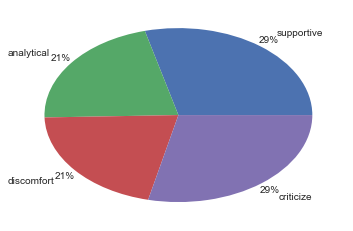

In [257]:
labels=['supportive','analytical','discomfort','criticize']
sentiment_freq=[0,0,0,0]
for t in train_tweets.Sentiment:
    if t=='supportive':
        sentiment_freq[0]=sentiment_freq[0]+1
    elif t=='analytical':
        sentiment_freq[1]=sentiment_freq[1]+1
    elif t=='discomfort':
        sentiment_freq[2]=sentiment_freq[2]+1
    else:
        sentiment_freq[3]=sentiment_freq[3]+1
        
print(sentiment_freq)
plt.pie(sentiment_freq[0:4], labels=labels[0:4],autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(train_tweets.text).toarray()
labels = train_tweets.Sentiment
features.shape

print(train_tweets)


                                                   text  favoriteCount  \
0     @PMOIndia Your demonetization plan was a maste...              0   
1     A well written article.\r\r\r\r\n#DeMonetizati...              0   
2     5,00,000 people supported Modi Ji's idea. It's...              0   
3     Does it really take over a month to open a ban...              0   
4     After  demonetization, the central government ...              1   
5      @AamAadmiParty: Catch @ArvindKejriwal talking...              0   
6     8  economics; demonetization, cryptocurrency,Ã...              0   
7     Implementation Guide on AuditorÃÂÃ¢ÂÂÃÂÃ...              0   
8      @TheDarjChron: #Demonetization #NorthEast Rea...              0   
9     If you find him, please remind him that he is ...              0   
10    Hear @navkendar_IDC discuss the future impact ...              0   
11     Farmers in Surat protesting against #demoneti...             56   
12    Our #Equity Chief Mahesh Patil s

In [259]:
lis=tfidf.get_feature_names()


In [260]:
train_tweets=train_tweets.apply(lambda x: x.astype(str).str.lower().str.split())

#train_tweets["text"] = train_tweets["text"].str.lower().str.split()
#train_tweets["text"]=train_tweets["text"].map(lambda text: text if type(text)!=str else text.lower())
#train_tweets['text']=train_tweets['text'].apply(lambda x: [item for item in x if item not in stop])

print(train_tweets.text)

0       [@pmoindia, your, demonetization, plan, was, a...
1       [a, well, written, article., #demonetization, ...
2       [5,00,000, people, supported, modi, ji's, idea...
3       [does, it, really, take, over, a, month, to, o...
4       [after, demonetization,, the, central, governm...
5       [@aamaadmiparty:, catch, @arvindkejriwal, talk...
6       [8, economics;, demonetization,, cryptocurrenc...
7       [implementation, guide, on, auditorãâã¢ââã...
8       [@thedarjchron:, #demonetization, #northeast, ...
9       [if, you, find, him,, please, remind, him, tha...
10      [hear, @navkendar_idc, discuss, the, future, i...
11      [farmers, in, surat, protesting, against, #dem...
12      [our, #equity, chief, mahesh, patil, spoke, to...
13      [atms, in, india, are, out, of, cash, after, g...
14      [so, what's, the, limit,, 24k, per, week, @sav...
15      [(worthless, notes), laid, down, to, form, a, ...
16      [how, to, convert, all, your, black, money, in...
17      [these

In [261]:
stop.append('AT_USER')
stop.append('URL')
hashtags=[]
def preprocessTweet(tweet):
    # process the tweets
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    st=re.findall(r'\#\w+', tweet)
    hashtags.extend(st)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = tweet.strip('\'"')
    
    
    
    return tweet

def replaceRepetitions(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)


#Feature vector
def getFeatureVector(tweet):
    featureVector = []
    #split tweet into words
    words = tweet.split()
    for w in words:
        #replace two or more with two occurrences
        w = replaceRepetitions(w)
        #strip punctuation
        w = w.strip('\'"?,.\n')
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
        #ignore if it is a stop word
        if(w in stop or val is None):
            continue
        else:
            featureVector.append(w.lower())
            #featureVector=addSynonyms(featureVector,w.lower())
            
    return featureVector

def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features

In [262]:
f = open('shuffled_tweets.csv','r',encoding='UTF-8')
file = csv.reader(f, delimiter=',')
featureList = []
# Getting tweets 
tweets = []


for row in file:
    sentiment = row[3]
    tweet = row[0]
    preprocessedTweet = preprocessTweet(tweet)
    print(preprocessedTweet)
    featureVector = getFeatureVector(preprocessedTweet)
    featureList.extend(featureVector)
    tweets.append((featureVector, sentiment))

    
# Remove featureList duplicates
featureList = list(set(featureList))

print(len(tweets))
random.shuffle(tweets)


# Extract feature vector for all tweets in one shote
training_set = nltk.classify.util.apply_features(extract_features, tweets)

print(len(training_set))
train_set, test_set = training_set[:1500], training_set[1500:]
print(test_set)

text
AT_USER your demonetization plan was a masterstroke but still lots of crisis for money in silvassa, no cash available at atm's
a well written article. demonetization demonetisation: are the poor really suffering? URL
5,00,000 people supported modi ji's idea. it's like taking a mug out of ocean of 130 billion. demonetization
does it really take over a month to open a bank account AT_USER in delhi ? bankingwoes demonetization cashlessindia AT_USER
after demonetization, the central government had said that there will be no problems to common man, but still common man facing problems
 AT_USER catch AT_USER talking to AT_USER right now on AT_USER demonetization
8 economics; demonetization, cryptocurrency,ãâãâ bitcoin URL
implementation guide on auditorãâãâs report in caro containing reporting on demonetization period transactions an dãâãâ sbn URL
 AT_USER demonetization northeast reaction: senior citizen "we are happy...everyone faces some trouble... but we are very happy

demonetization is catalyzing digital payments growth in india URL fintech payments mobile digital india
 advocate j. aslam basha press meet on demonetization URL via AT_USER AT_USER
abhishek lodha, md, lodhagroup shares his views on the impact of demonetization on realestate via AT_USER URL
 AT_USER watch what AT_USER thinks about demonetization .. URL
AT_USER i think comparison between feb'16 and feb'17 is what matters from pov of demonetization and of course it is staggering
gnfcãâãâs township at bharuch in gujarat became indiaãâãâs first cashless township after demonetization. gk
 AT_USER look how toi is misleading people &amp; spreading false statement against demonetization !! media and oppositionxposed https:ãâãâ¦
must read! what has demonetization done to 20 trillion human trafficking industry?? URL via AT_USER
please take part in this survey &amp; give your valuable input on demonetization . pm has asked your first hand... URL
 'we don't know about rest of indi

demonetization akhilesh=not good,black money is good raja=ppl dying in q pinarayi=agenda to kill co-op banks run by concommies anymore?
# arun jaitley# demonetization# kerala mps# note scarcity# sbt URL arunjaitley demonetization keralamps notescarcity
 for all of you who joined my twitter feed on the india story. here is the podcast from AT_USER on the topic. URL
do you support demonetisation demonetization move bt pm AT_USER ? blackmoney corruption
 mind blowing response from international media to demonetization! it will shut the mouth of opposition! URL
 AT_USER again it is a demonetization moment......the sickular celebrates...mullah also.. hindu get united.. mãâãâ¦ URL
achedin jumlalogic demonetization did you notice atm's are running out of cash? hmmm...where is the money going?
 AT_USER do u support demonetization ? indiragandhi assam worldtoiletday confusedmodisarkar oppositionxposed jioatyoãâãâ¦
demonetization -heard from hnis that they r getting calls to convert th

In [265]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
res1=nltk.classify.accuracy(classifier, test_set)
print(res1)
# Test the classifier
testTweet = ' people have to stand in long queues to get their own money'
preprocessedTestTweet = preprocessTweet(testTweet)
print (classifier.classify(extract_features(getFeatureVector(preprocessedTestTweet))))

0.5260869565217391
discomfort


In [264]:
imp=classifier.show_most_informative_features(1000)

important_words='cash,via,banks,watch,indian,move,secy,economy,support,results,due,long,common,atms,decision,affected,see,bank,poor,killed,black,views,died,line,money,blackmoney,read,still,impact,modi,farmers,latest,withdraw,read,queue,demonetization,digital,man,running,common,bjp,like,hear,stand,life,supports,says,back,poll,check,failed,opposition,wedding,suffering,news,view,demonetisation,parliament,people,media,life,long,give,big,crunch,exchange,got,could,take,business,interesting,rise,price,prices,thanks,thankyou,thank you,old,unable,hardship,problems,problem,crisis,crores,results,part,team,question,much,govt,government,standing,around,make,need,shortage,debate,mobile,growth'
important_features=important_words.split(',')
print(important_features)



Most Informative Features
           contains(via) = True           analyt : critic =     31.6 : 1.0
           contains(atm) = True           discom : suppor =     24.9 : 1.0
          contains(atms) = True           discom : analyt =     23.1 : 1.0
         contains(watch) = True           analyt : suppor =     18.6 : 1.0
       contains(support) = True           suppor : discom =     17.7 : 1.0
          contains(cash) = True           discom : analyt =     16.2 : 1.0
      contains(affected) = True           discom : suppor =     15.5 : 1.0
       contains(farmers) = True           discom : suppor =     14.6 : 1.0
        contains(queues) = True           discom : critic =     13.9 : 1.0
           contains(dea) = True           analyt : suppor =     12.3 : 1.0
         contains(black) = True           suppor : discom =     12.0 : 1.0
        contains(latest) = True           analyt : critic =     11.7 : 1.0
          contains(secy) = True           analyt : suppor =     10.5 : 1.0

     contains(reporting) = True           analyt : suppor =      2.3 : 1.0
       contains(various) = True           analyt : suppor =      2.3 : 1.0
          contains(blog) = True           analyt : suppor =      2.3 : 1.0
           contains(mad) = True           analyt : suppor =      2.3 : 1.0
           contains(per) = True           analyt : suppor =      2.3 : 1.0
        contains(mahesh) = True           analyt : suppor =      2.3 : 1.0
       contains(bitcoin) = True           analyt : suppor =      2.3 : 1.0
         contains(paper) = True           analyt : suppor =      2.3 : 1.0
        contains(shared) = True           analyt : suppor =      2.3 : 1.0
          contains(curb) = True           analyt : suppor =      2.3 : 1.0
        contains(listen) = True           analyt : suppor =      2.3 : 1.0
      contains(expected) = True           analyt : suppor =      2.3 : 1.0
         contains(spoke) = True           analyt : suppor =      2.3 : 1.0
     contains(including) 

           contains(din) = True           critic : suppor =      1.7 : 1.0
       contains(without) = True           critic : suppor =      1.7 : 1.0
         contains(noise) = True           critic : suppor =      1.7 : 1.0
    contains(population) = True           critic : suppor =      1.7 : 1.0
      contains(election) = True           critic : suppor =      1.7 : 1.0
           contains(jan) = True           critic : suppor =      1.7 : 1.0
          contains(hell) = True           critic : suppor =      1.7 : 1.0
         contains(means) = True           critic : suppor =      1.7 : 1.0
      contains(feedback) = True           critic : suppor =      1.7 : 1.0
          contains(left) = True           critic : suppor =      1.7 : 1.0
          contains(none) = True           critic : suppor =      1.7 : 1.0
          contains(care) = True           critic : suppor =      1.7 : 1.0
          contains(body) = True           critic : suppor =      1.7 : 1.0
         contains(among) 